<font size = 7 color = 'darkblue'><b>THEORY AND SIMULATION OF THE ISING MODEL</b></font>

<font size = 6 align = 'center' color = 'blue'><i>Kaue Hermann Abbehausen</i></font>




<font size = 7 color = 'green'> Detalhes deste Seminário</font>

O objetivo deste notebook é averiguar e utilizar o código do artigo abaixo para criar e apresentar gráficos semelhantes aos que foram apresentados no artigo. A apresentação será feita como trabalho da matéria *Mecânica Estatística*.

Este notebook está foi escrito de forma com que fosse possível utilizá-lo como apresentação de slides, e para tal usei a expansão RISE no Jupyter Notebook.

**Artigo Usado**:THEORY AND SIMULATION OF THE ISING MODEL
Acessível em: https://arxiv.org/abs/2105.00841v1

A célula de código não é original minha, foi copiada do artigo e alterada para poder utilizar a biblioteca pandas e criar os gráficos.



# Configuração da dimensões da tela de apresentação

In [2]:
#configuração da dimensões da tela de apresentação
from notebook.services.config import ConfigManager
cm = ConfigManager()

#defina as dimensões da apresentação.
cm.update('rise', {
              'width': '100%',
              'height': '100%',
              'scroll': True,
              'backimage':None,
            'header': None,
            'footer': '<h3>Kaue Hermann<h3>'
              })
 

{'width': '100%',
 'height': '100%',
 'scroll': True,
 'footer': '<h3>Kaue Hermann<h3>'}

# Escrevendo a apresentação e os códigos

### Duas Categorias da Mecânica Estatística
<p> <p> <p> <p><p> <p> <p> <p> <p> <p> <p> <p> <p> <p> <p> <p>
<table border="50" width="100%"
cellpadding="10">
<tr>

<td width="50%" valign="top">
    <b>1. Partículas não interagentes:</b> 

    . Calor Espécifico;
    . Reações Químicas;
    . Condensados de Bose-Einstein
</td>

<td width="50%" valign="top">
    <b>2. Partículas interagentes:</b> 

    . Transição de Fase;
    . Ferromagnetismo;
    . Coexistência de Fase
</td>

</tr>
</table>


<font aling = 'top' size = '7'> Energia e consequência</font>
1. Na primeira categoria a energia depende <font color= 'darkyellow'>dos níveis de energia da partícula</font>
2. Na segunda categoria <strong color= 'yellow'> não podemos dizer o mesmo</strong>


## Modelo mental simples

Uma grade onde pontos desta grade são sítios, e as interações são dadas pelos vizinhos mais próximos.
* **Ferromagnetismo:** Os sítios são ocupados por átomo com momento magnético $\mu = g.\mu_\beta.\sqrt{(J(J+1))}$. g é fator de Lande e $\mu_\beta = \frac{e}{2mc}$ o magneton de Bohr.




Cada microestado deste sistema tem uma energia associada as interações de pares e associada a um campo magnético, se existir.
$\\ E_{ij} = K_{ij} \pm J_{ij}$ e 
$$  K_{ij} =\iint \phi_i(r_1)\phi_i^*(r_1)\hat u_{ij} \phi_j(r_2)\phi_j^*(r_2)dr_1 dr_2 \\ 
 J_{ij} =\iint \phi_j^*(r_2)\phi_i^*(r_1)\hat u_{ij} \phi_i(r_1)\phi_j(r_2)dr_1 dr_2 $$ 
 
 Onde $\phi_i(r_1)$ é a função de onda partícula $i$ na posição $r_1$
 
 

## Energia e Hamiltoniana

$$E_s - E_t = 2J$$ 

$$\hat H = -2 \sum\limits_{i>j}{J_{ij}s_i.s_j}$$

$$\hat H = -2 \sum\limits_{i>j}{J_{ij}s_i.s_j} - \mu.B\sum\limits_{i}{\hat \sigma_i}$$


<img src="grade.jpg" width="550" hight = "700"/>

## Entropia do sistema
**1. Todos spins iguais: Up ou  Down**

$$ S = k_b \ln{\Omega} =k_b \ln{2} $$

**2. Apenas um spin diferente:**
$$ S = k_b \ln{\Omega} = k_b \ln{\frac{N!}{(N-1)!}} = k_b \ln{25} $$

**3. Estado de maior entropia:**
$$ S = k_b \ln{\Omega} = k_b \ln{\frac{N!}{(N-N/2)!}} $$

### A magnetização fica:
* Caso 1 e 2: Up ou Down: **Há Magnetização espontânea**

* Caso 3: Maior entropia: **Não há magnetização** 

### Papel da temperatura:
Existe uma temperatura crítica para a transição de fase.

* Para $T < T_c$  temos $M > 0$
* Para $T > T_c$  temos $M = 0$

**Temos a Quebra espontânea da simetria em $T_c$**



### Valor médio de uma observável A :
$$ \langle A\rangle =\frac{\int A(p,q)e^{-\beta E(q,p)} d^{DN}q d^{DN}p}{\int e^{-\beta E(q,p)} d^{DN}q d^{DN}p} $$
### Método de Monte Carlo
$$ \langle A\rangle =\frac{1}{M} \sum\limits_{i}^{M} A(q_i) $$



## Monte Carlo e Algoritmo de Metropolis


**No Monte Carlo**: Pesa com o fator de peso de Boltzman a amostra randomicamente criada.

**Algoritmo de Metropolis(Importance Sampling)**: Organiza as amostras (microestado) de acordo com o fator de peso.


O algoritmo de Metropolis é mais otimizado e tem custo efetivo computacional menor. Todos os microestados com escolhidos
baseados no fator peso. E então o valor médio de observáveis termodinâmicas podem ser calculadas pela equação da média 
mostrada

## Algoritmo de Metropolis
$$ \overline{P}(q) =\frac{e^{-\beta E(q)}}{\sum\limits_{q'} e^{-\beta E(q')} } $$
$$ \frac{P(q')}{P(q)} = e^{-\beta (E(q') - E(q))} $$

Durante o algoritmo vamos realizar caminhadas aleatórias na grade e usar esta equação para pesar se o movimento acontece ou não.

<font size = 8> <mark>Passos</mark> e Detalhes do Algoritmo</font>

1. Mude o microestado para outro aleatoriamente. Ocorre mudança direta na energia total.

2. Calcula a diferença de energia $\Delta E$. 
* Se $E(q') \le E(q)$ então $P(q') \ge P(q)$, logo **a mudaça é aceita**.
* Caso Se $E(q') \ge E(q)$ então $P(q') \le P(q)$, então escolha aleatóriamente um valor entre 0 e 1,e se $ rand() \le e^{-\beta \Delta E}$ **a mudança é aceita**.

3. Repita os passos 1 a 2 para todos os spins, um de cada vez. Este passo determina uma varredura de monte carlo.

4. Repita os passos 1 a 3 até que o sistema esteja em equilíbrio(eqstp).

5. Repita os passos 1 a 3 para um número de varreduras de Monte Carlo (mcstp).

<font size = 8> Passos e <mark>Detalhes do Algoritmo</mark></font>
* Antes: $$E(q) = E_o + s_{ij}(s_{i+1,j} + s_{i-1,j} + s_{i,j+1} + s_{i,j-1})$$
  
* Depois: $$E(q') = E_o - s_{ij}(s_{i+1,j} + s_{i-1,j} + s_{i,j+1} + s_{i,j-1})$$
$E_o$ é a energia de todo o sistemas excluindo estes 5 spins.

Assim temos
$$\Delta E = -2 s_{ij}(s_{i+1,j} + s_{i-1,j} + s_{i,j+1} + s_{i,j-1})$$


In [3]:
#!/ usr / bin/ python3
import random
import numpy as np
from numpy . random import rand
# - - - - - - - - -- ---- --- ---- --- --- ---- --- ---- --- --L = 5 # Size of the square lattice
array = []
mcstp = 100 # Number of MC sweep
eqstp = 100 # Number of MC sweep for equilibration
D = 2 # Lattice dimension
L = 5
N = L ** D # Number of spins
NN = 4 # Number of nearest - neighbo
T_0 = 0.5 # Initial temperature
T_f = 10.0 # Final temperature
dT = 0.1 # Temperature step
# - - - - - - - - -- ---- --- ---- --- --- ---- ---
c = 0 # Counter
T = T_0 # Temperature initialization
norm = 1./( mcstp *N * NN )
nr2 = norm / mcstp
# - - - - - - - - -- ---- -
def INIT (L) :
    """ Generates initial confuguration ( cfg ): all spins up """
    cfg = np . random . randint(1 , size = (L , L) ) + 1
    return cfg
# - - - - - - - - -- ---- --- ---- --- --
def METROPOLIS( spin , beta ):
    """ The Metropolis algorithm """
    for i in range (L ):
        for j in range (L):
            x = np . random . randint(0 , L ) # X coordinate
            y = np . random . randint(0 , L ) # Y coordinate
            s = spin [x , y]
    # Periodic boundary conditions --------------
            R = spin [( x + 1) %L , y] + spin [x , (y + 1) %L] \
            + spin [( x - 1) %L , y ] + spin [x , (y - 1) %L ]
    # - - - - - - - - --- ---- --- --- ---- --- ---- --- ---- --- --
            dE = 2* s* R # Energy difference
            if dE < 0.:
                s *= -1 # Flips the spin
            elif rand () < np . exp ( - dE * beta ): # Throws the die
                s *= -1 # Flips the spin
            spin [x , y ] = s # Returns the spin without flipping
    return spin
 # - - - - - - - - -- ---- --- ---- --- --
def CALCULATE_ENERGY ( spin ):
    """ Computes energy """
    En = 0. # Energy
    for x in range ( len ( spin )):
        for y in range ( len ( spin ) ):
            S = spin [x , y]
    # Periodic boundary conditions --------------
            R = spin [( x + 1) %L , y] + spin [x , (y + 1) %L] \
            + spin [( x - 1) %L , y] + spin [x , (y - 1) %L]
    # - - - - - - - - --- ---- --- --- ---- --- ---- --- ---- --- --
            En -= S*R
    return En
    # - - - - - - - - -- ---- --- ---- --- --- ---- --
def CALCULATE_MAGNETIZATION ( spin ):
    """ Computes magnetization """
    mgnt = np . sum ( spin ) # Magnetization
    return mgnt

Temp = [T]
while T <= T_f: # Temperature loop ( main loop )
    T += dT
    summ = [0 , 0 , 0 , 0] # Accumulators
    spin = INIT (L )
    c = c + 1
    B = 1./ T; B2 = B *B
    for sweep in range ( eqstp ): # Equilibration loop
        METROPOLIS( spin , B )
    # - - - - - - - - -- ---- --- ---- --- --- ---- --- ---- --- ----
    for sweep in range ( mcstp ): # Main MC loop
        METROPOLIS( spin , B )
        E = CALCULATE_ENERGY( spin )
        M = CALCULATE_MAGNETIZATION ( spin )
        # - - - - - - - --- --- ---- --- --- ---- --- ---
        summ[0] += E # E accumulator
        summ[1] += E*E # E ^2 accumulator
        summ[2] += M # M accumulator
        summ[3] += M*M # M ^2 accumulator
# - - - - - - - - -- ---- --- ---- --- --- ---- --- ---- --- ---- --- -
### Thermodynamic averages at each temperature step
    mean_E = summ[0]* norm # Mean E
    mean_M = summ[2]* norm # Mean M
    C_v = ( norm * summ [1] - nr2* summ [0]* summ [0]) * B2 # Specific heat ( C_v)
    chi = ( norm * summ [3] - nr2* summ [2]* summ [2]) *B # Susceptibility ( Chi )
    L1 = [mean_E,mean_M,T]
    array.append(L1)

In [4]:
print(f'Média E:{mean_E},Média M: {mean_M}, Cv{C_v}, Susceptibilidade: {chi}')

Média E:-0.112,Média M: 0.0014, Cv0.022272326242525335, Susceptibilidade: 0.0433469306930694


In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(array, columns = ['E','M','T'])

In [7]:
df.describe()

,E,M,T
count,96.000000,96.000000,96.000000
mean,-0.361458,0.035660,5.350000
std,0.309062,0.100125,2.785678
min,-1.000000,-0.214200,0.600000
25%,-0.471200,-0.013200,2.975000
50%,-0.206400,0.001600,5.350000
75%,-0.137600,0.018900,7.725000
max,-0.079200,0.250000,10.100000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

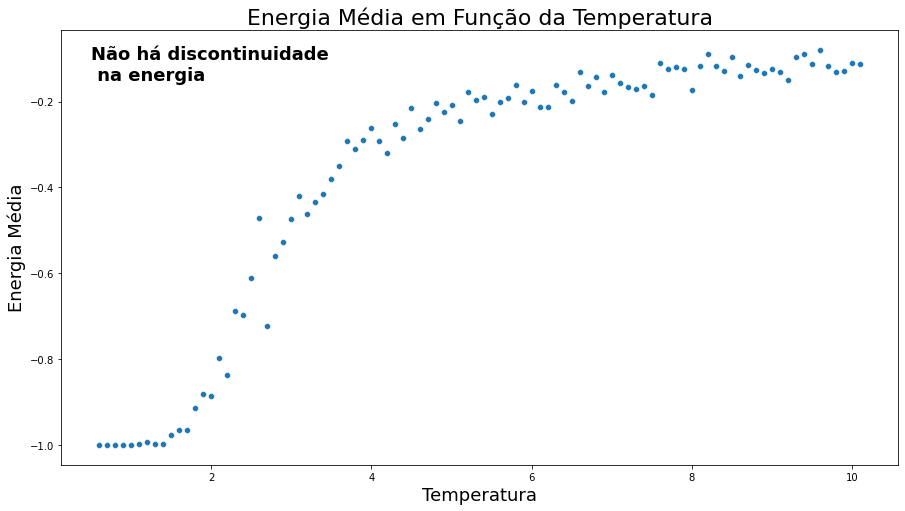

In [48]:
ax = sns.scatterplot(x = 'T', y = 'E', data = df)
ax.figure.set_size_inches(15,8)
ax.set_xlabel('Temperatura', fontsize = 18)
ax.set_ylabel('Energia Média', fontsize = 18)
ax.set_title('Energia Média em Função da Temperatura', fontsize = 22)

plt.text(0.5, -0.15, 'Não há discontinuidade \n na energia', fontdict = {
    'fontsize':18,'fontweight':'bold',
} )

plt.savefig('Energia.png')

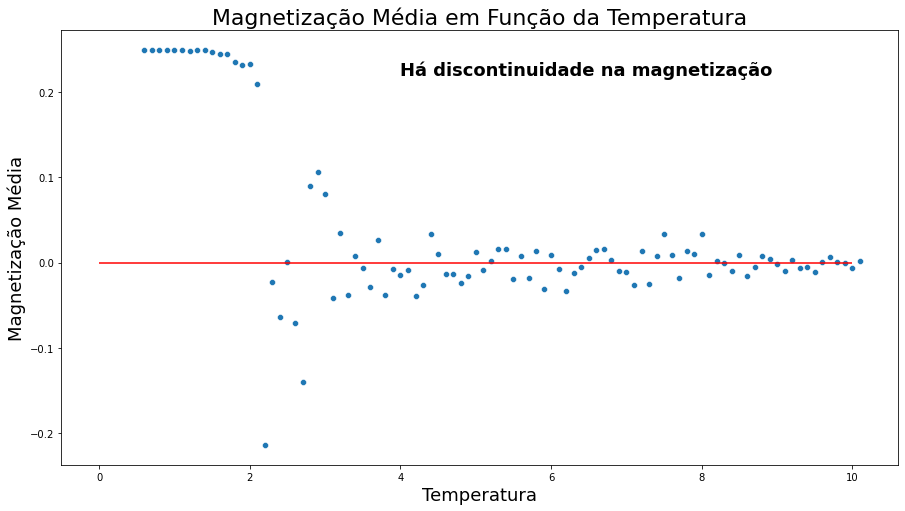

In [47]:
ax = sns.scatterplot(x = 'T', y = 'M', data = df)
ax.figure.set_size_inches(15,8)
ax.set_xlabel('Temperatura', fontsize = 18)
ax.set_ylabel('Magnetização Média', fontsize = 18)
ax.set_title('Magnetização Média em Função da Temperatura', fontsize = 22)
plt.hlines(y = 0, xmin =0, xmax = 10, color = 'r')

plt.text(4.0, 0.22, 'Há discontinuidade na magnetização', fontdict = {
    'fontsize':18,'fontweight':'bold',
} )

plt.savefig('Magnetizacao.png')

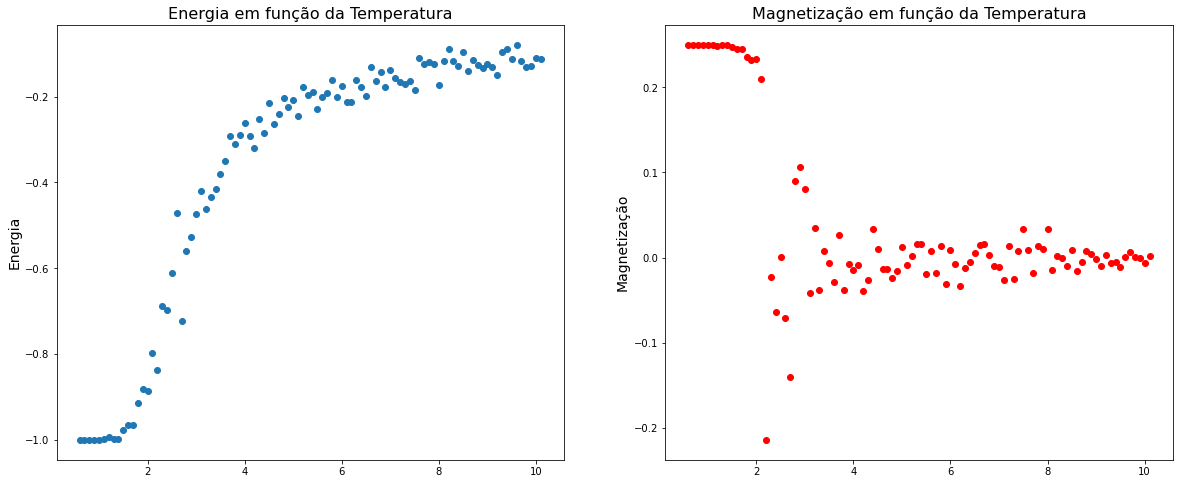

In [11]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize = (20,8))
fig.figsize = (20,8)
ax1.scatter(df['T'],df.E)
ax1.set_title('Energia em função da Temperatura', fontsize = 16)
ax1.set_ylabel('Energia', fontsize = 14)
ax2.scatter(df['T'],df.M, color = 'r')
ax2.set_title('Magnetização em função da Temperatura', fontsize = 16)
ax2.set_ylabel('Magnetização', fontsize = 14)
plt.savefig('Artigo_EM.png')

# Área de imagens para apresentação

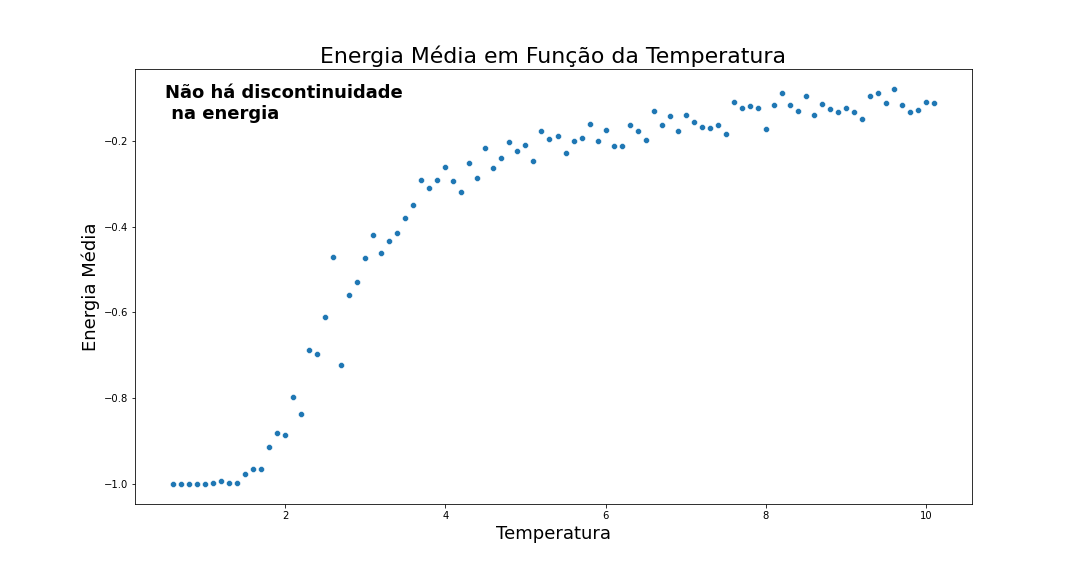

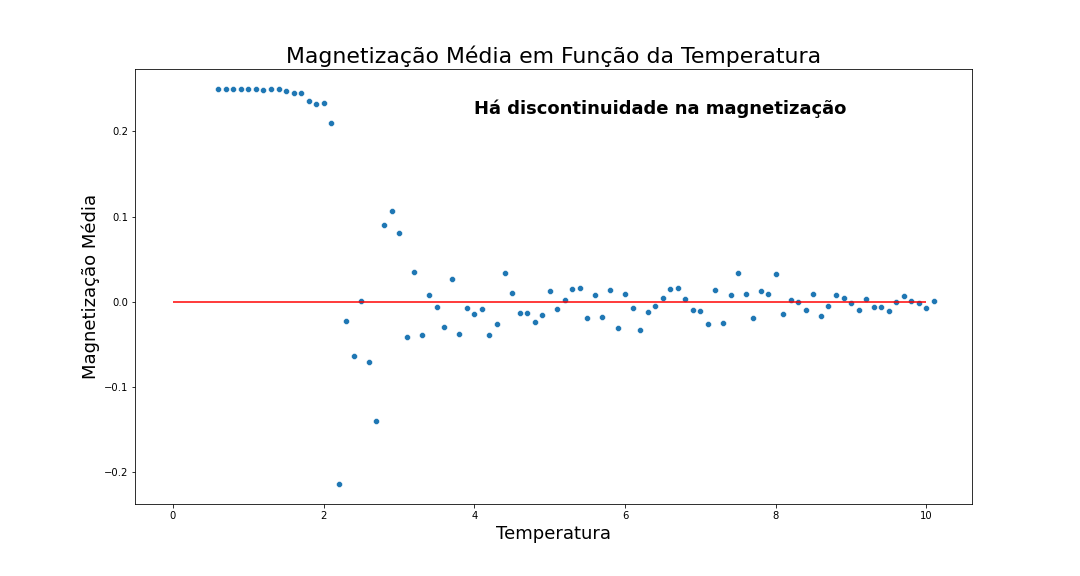

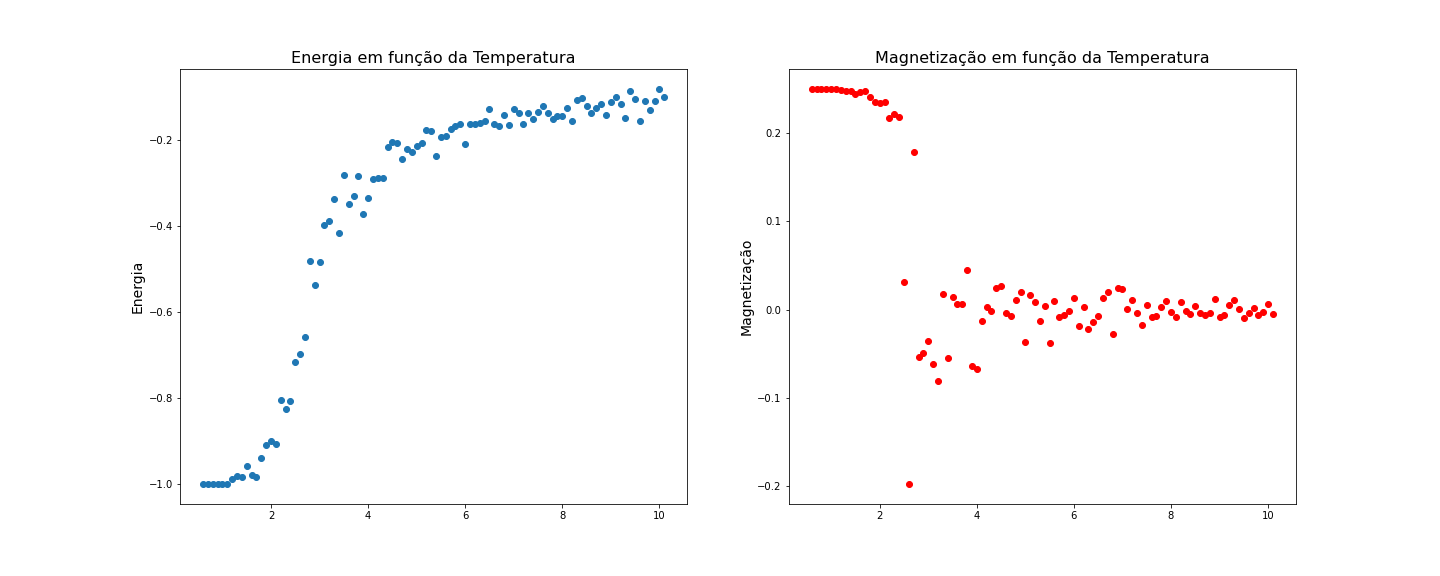

### Para Calcular $C_v$

$$C_v = \frac{\langle E^2\rangle - \langle E\rangle^2}{K_b T^2} $$

### Para Calcular $\chi$

$$\chi = \frac{\langle M^2\rangle - \langle M\rangle^2}{K_b T^2} $$


<img align = 'center'  src="2Cod.png" width = '750'>


# Referência
Shekaari, Ashkan; Jafari, Mahmoud.Theory and Simulation of the Ising Model.Disponível em: <https://arxiv.org/abs/2105.00841v1>. Acesso em: 26/08/2022. 